# Visualizing the predictions from your KNN classifier

Visualizing our data and the predictions we make can be informative to how well our prediction algorithm is working. Let's visualize our training data and the predictions for our test data. We'll even work up to plotting the decision boundaries between classes to see the limits of our algorithm and how that boundary changes as the number of nearest neighbors changes.

In [228]:
# Set the output figure format to be high resolution
%config InlineBackend.figure_format = 'retina'

# Load our previously written classification class (we saved it to a file 'src/knn.py')
from src.knn import Knn_classification

Let's start by reloading our data and making predictions with our classification algorithm so that we can plot the results:

In [229]:
import pandas as pd

# Load our data
data_train = pd.read_csv("data/train.csv")
data_test = pd.read_csv("data/test.csv")

x_train = data_train[["PetalWidthCm", "SepalWidthCm"]].values
y_train = data_train[["Species"]].values

x_test = data_test[["PetalWidthCm", "SepalWidthCm"]].values
y_test = data_test[["Species"]].values

# Initialize the KNN model
myknn = Knn_classification()

# Train the model
myknn.fit(x_train, y_train)

# Make predictions on the test data
k = 5
y_prediction = myknn.predict(x_test, k)
y_prediction

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor'], dtype='<U15')

Now, we'll gather our visualization code from earlier when we were exploring our data

As we're doing this, we'll build a function for visualizing the data. Let's start with visualizing our data by class. We have three classes: ['Iris-setosa', 'Iris-versicolor' ,'Iris-virginica']. Let's plot each class as a different color (you can find a full list of colors for matplotlib [here](https://matplotlib.org/stable/gallery/color/named_colors.html)). We'll develop a plotting function along the way to better display them. To start off with, we'll want to determine the observations in the training data that have each type of label and plot them in that color. We'll assume the features are two dimensional for this, which they are for our example.

Text(0, 0.5, 'Sepal Width (cm)')

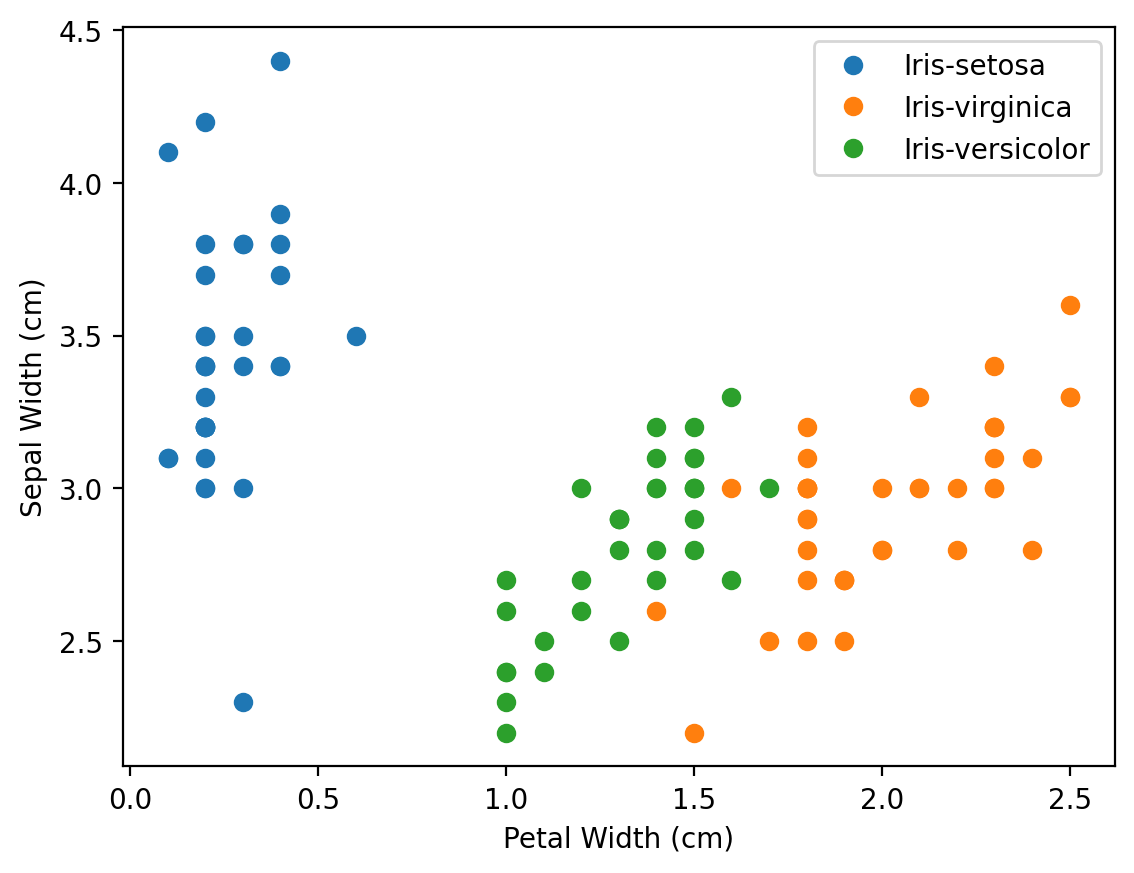

In [230]:
import matplotlib.pyplot as plt

# Get each unique type of label
class_labels = data_train["Species"].unique()

fig, ax = plt.subplots()

# Loop through each of the class labels and plot them
for label in class_labels:
    # Get the data that have that label
    data_subset = data_train.loc[data_train["Species"] == label]
    ax.plot(
        data_subset["PetalWidthCm"],
        data_subset["SepalWidthCm"],
        linestyle="",
        marker="o",
        label=label,
    )
ax.legend()
ax.set_xlabel("Petal Width (cm)")
ax.set_ylabel("Sepal Width (cm)")

Now, let's place this into a function that we can use to plot on any axis that we create, so that we could make subplots easily of both the training and test data.

In [231]:
# Get each unique type of label


def plot_data_with_labels(ax, data):
    class_labels = data["Species"].unique()

    # Loop through each of the class labels and plot them
    for label in class_labels:
        # Get the data that have that label
        data_subset = data.loc[data["Species"] == label]
        ax.plot(
            data_subset["PetalWidthCm"],
            data_subset["SepalWidthCm"],
            linestyle="",
            marker="o",
            label=label,
        )
    ax.legend()
    ax.set_xlabel("Petal Width (cm)")
    ax.set_ylabel("Sepal Width (cm)")

Now let's see this in action by plotting both our training and test data, each on their own axis:

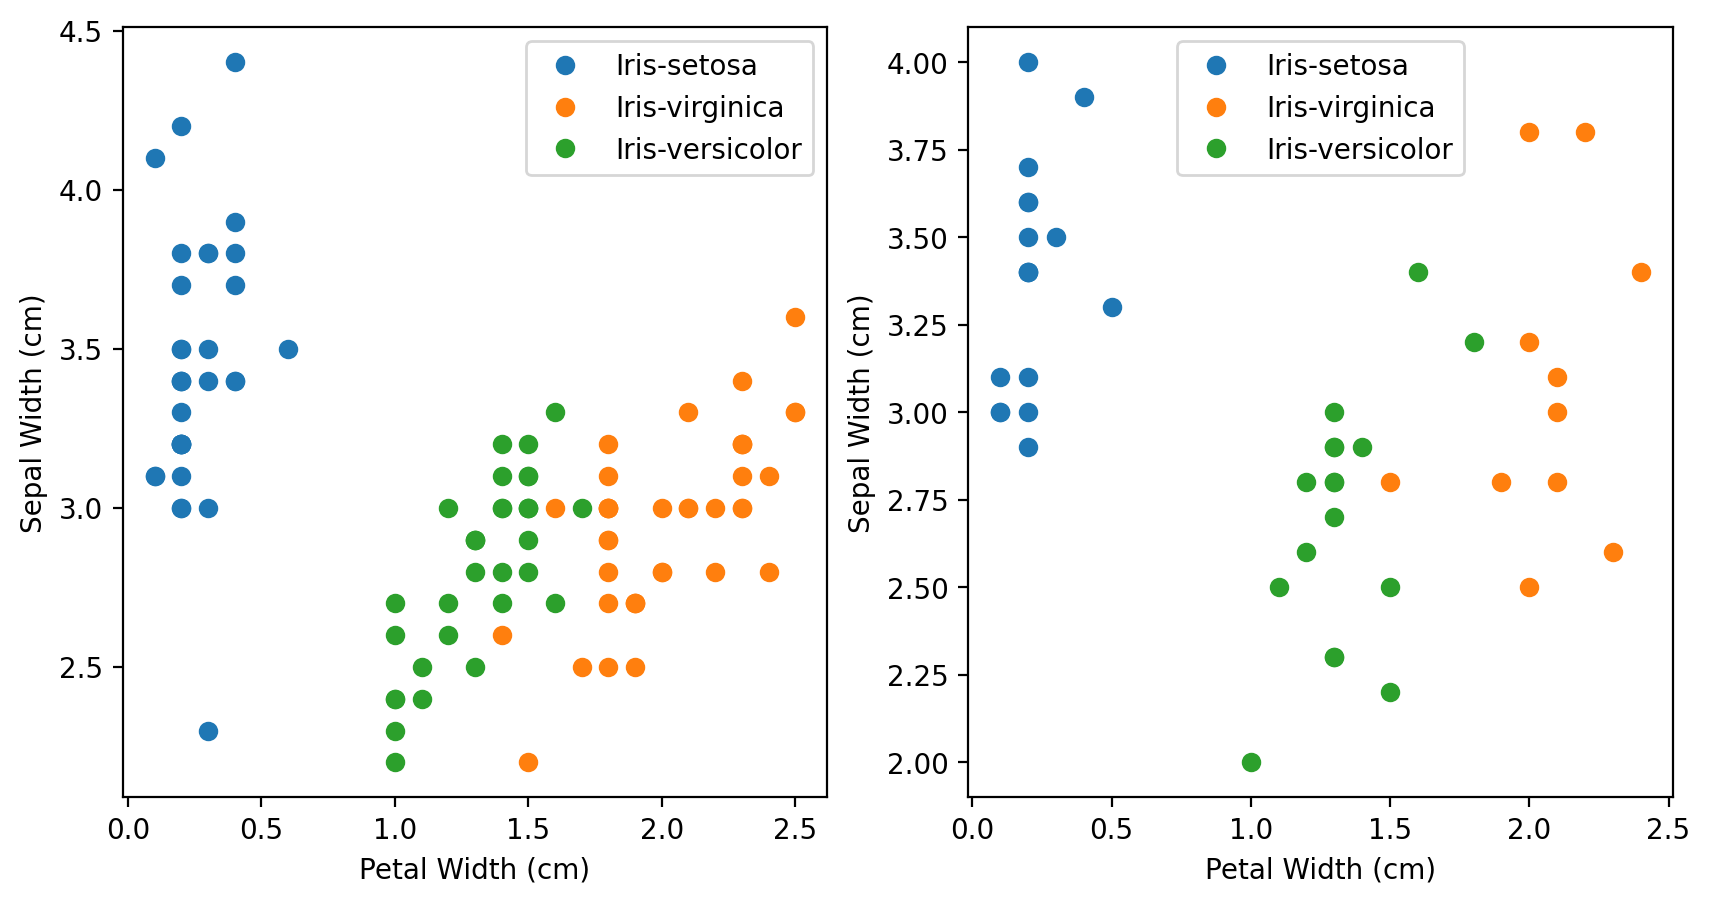

In [232]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
plot_data_with_labels(ax1, data_train)
plot_data_with_labels(ax2, data_test)

This is looking very good, but we have two issues. First, we haven't labeled which is the training data and which is the test data. Let's explicitly set what the labels are so the order is always consistent. Secondly, the axes are a bit different between the two - see on the left the data on the y axis reaches 4.5 while on the right it only reaches 4. Let's adjust the function to specify the extent ourselves.

In [233]:
def plot_data_with_labels(ax, data, labels, title, extent, size=5):
    # Loop through each of the class labels and plot them
    for label in labels:
        # Get the data that have that label
        data_subset = data.loc[data["Species"] == label]
        ax.plot(
            data_subset["PetalWidthCm"],
            data_subset["SepalWidthCm"],
            linestyle="",
            marker="o",
            label=label,
            markersize=size,
        )
    ax.legend()
    ax.set_xlim([extent[0], extent[1]])
    ax.set_ylim([extent[2], extent[3]])
    ax.set_title(title)
    ax.set_xlabel("Petal Width (cm)")
    ax.set_ylabel("Sepal Width (cm)")

Now let's try that again:

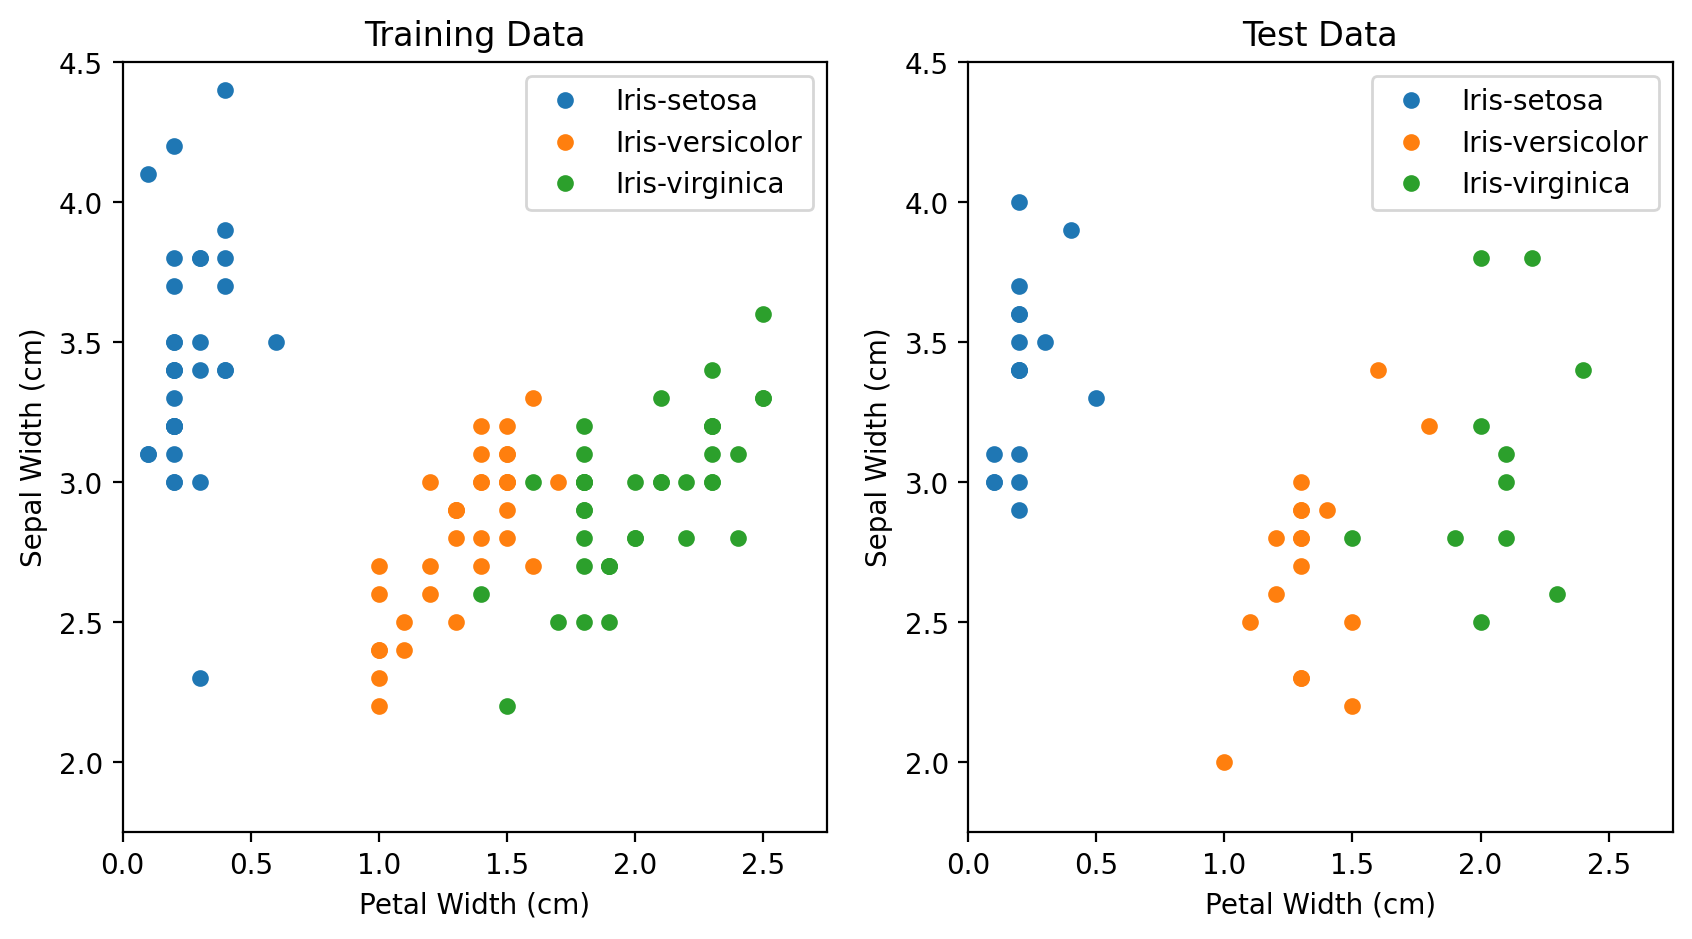

In [234]:
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
extent = [0, 2.75, 1.75, 4.5]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
plot_data_with_labels(ax1, data_train, labels, "Training Data", extent)
plot_data_with_labels(ax2, data_test, labels, "Test Data", extent)

But we need to add in the predictions to see how well this worked. Let's start by simply circling each test observation with the color of the class that was predicted for it. Let's add a column to our test DataFrame that includes the prediction. To accomplish this, we'll need to identify each of the mistakes. Let's add that in as a column in the DataFrame.

In [235]:
data_predictions = data_test
data_predictions.insert(
    3, "prediction", y_prediction
)  # Adds the "prediction" column to the 3rd index (becomes the 4th column)

In [236]:
data_predictions

,SepalWidthCm,PetalWidthCm,Species,prediction
0,3.0,0.1,Iris-setosa,Iris-setosa
1,3.4,0.2,Iris-setosa,Iris-setosa
2,2.6,2.3,Iris-virginica,Iris-virginica
3,2.3,1.3,Iris-versicolor,Iris-versicolor
4,2.9,1.4,Iris-versicolor,Iris-versicolor
5,2.9,0.2,Iris-setosa,Iris-setosa
6,2.8,1.2,Iris-versicolor,Iris-versicolor
7,3.4,0.2,Iris-setosa,Iris-setosa
8,2.5,2.0,Iris-virginica,Iris-virginica
9,3.7,0.2,Iris-setosa,Iris-setosa


Now we'll add a column that states whether the prediction was true or false.

In [237]:
data_predictions["correct"] = (
    data_predictions["Species"] == data_predictions["prediction"]
)
data_predictions

,SepalWidthCm,PetalWidthCm,Species,prediction,correct
0,3.0,0.1,Iris-setosa,Iris-setosa,True
1,3.4,0.2,Iris-setosa,Iris-setosa,True
2,2.6,2.3,Iris-virginica,Iris-virginica,True
3,2.3,1.3,Iris-versicolor,Iris-versicolor,True
4,2.9,1.4,Iris-versicolor,Iris-versicolor,True
5,2.9,0.2,Iris-setosa,Iris-setosa,True
6,2.8,1.2,Iris-versicolor,Iris-versicolor,True
7,3.4,0.2,Iris-setosa,Iris-setosa,True
8,2.5,2.0,Iris-virginica,Iris-virginica,True
9,3.7,0.2,Iris-setosa,Iris-setosa,True


Lastly, let's clean this up and leave the predictions renamed as "Species" and whether that prediction was correct.

In [238]:
data_predictions = data_predictions.drop(columns=["Species"])
data_predictions = data_predictions.rename(columns={"prediction": "Species"})
data_predictions

,SepalWidthCm,PetalWidthCm,Species,correct
0,3.0,0.1,Iris-setosa,True
1,3.4,0.2,Iris-setosa,True
2,2.6,2.3,Iris-virginica,True
3,2.3,1.3,Iris-versicolor,True
4,2.9,1.4,Iris-versicolor,True
5,2.9,0.2,Iris-setosa,True
6,2.8,1.2,Iris-versicolor,True
7,3.4,0.2,Iris-setosa,True
8,2.5,2.0,Iris-virginica,True
9,3.7,0.2,Iris-setosa,True


Now we can select only the mistakes:

In [239]:
# Select the mistakes
mistakes = data_predictions[data_predictions["correct"] == False]

Let's create a function to plot those mistakes by making the marker bigger with no color in the center to effectively circle the mistakes.

In [240]:
def plot_mistakes(ax, data, color):
    # Loop through each of the class labels and plot them
    ax.plot(
        data["PetalWidthCm"],
        data["SepalWidthCm"],
        linestyle="",
        color=color,
        marker="o",
        label="Incorrect Prediction",
        markersize=10,
        markerfacecolor="none",
    )

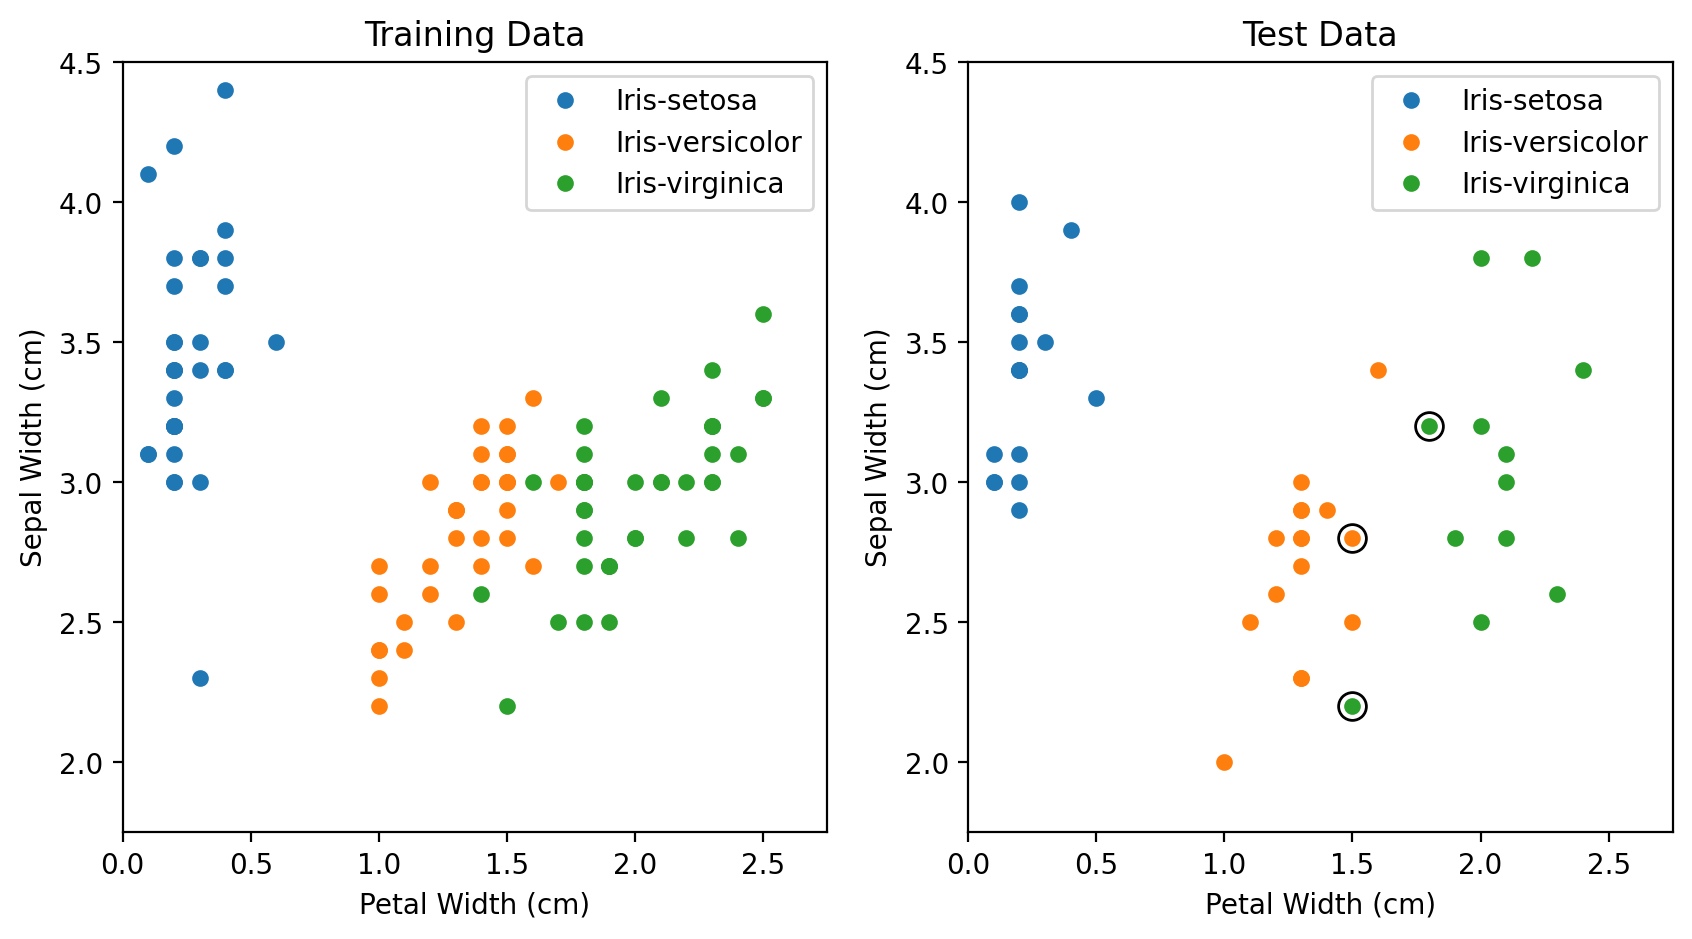

In [241]:
# Plot the data and circle the mistakes in black
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
colors = ["tab:blue", "tab:orange", "tab:green"]
extent = [0, 2.75, 1.75, 4.5]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
plot_data_with_labels(ax1, data_train, labels, "Training Data", extent)
plot_data_with_labels(ax2, data_predictions, labels, "Test Data", extent)
plot_mistakes(ax2, mistakes, "black")

Fantastic! Now we can clearly see our training data and which of our test data samples were mistakenly classified.

Now let's take this a step further using our wealth of numpy and plotting knowledge to show where the boundary is for each class prediction for our problem. This is not a trivial plot to make but can reveal a great deal about how our algorithm is classifying our data. What we want to do is make a plot that will show the prediction value any point in feature space.

Let's create a plot that does just that! We'll start by creating a grid of values that represent every pair of inputs into the algorithm in the features space. In this case, our petal width values go from about 0 to 2.5 while sepal width ranges from about 2 to 4.5. The numpy `meshgrid` function can help us here. Let's see it in action before we get started:

In [242]:
x = [1, 2, 3, 4]
y = [5, 6, 7, 8]
X, Y = np.meshgrid(x, y)
print(X)
print(Y)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[5 5 5 5]
 [6 6 6 6]
 [7 7 7 7]
 [8 8 8 8]]


Then if we look at any point in the grid, we have our x value from the `X` matrix and our y value from the `Y` matrix. We can use those as inputs to get a prediction for every value across a range of our feature space values. We can do this by collecting the pairs of inputs that we want to make predictions for. As an example, here's how we can create our vectorized inputs to put into our prediction algorithm:

In [243]:
Xv = X.reshape(-1)  # Creates a 1-D array of all the x inputs
Yv = Y.reshape(-1)  # Creates a 1-D array of all the y inputs
Pv = np.array(
    [Xv, Yv]
).T  # Creates pairs (x,y) inputs for every point in the matrix. The `.T` transposes the matrix

In [244]:
Xv

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

In [245]:
Yv

array([5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8])

In [246]:
Pv

array([[1, 5],
       [2, 5],
       [3, 5],
       [4, 5],
       [1, 6],
       [2, 6],
       [3, 6],
       [4, 6],
       [1, 7],
       [2, 7],
       [3, 7],
       [4, 7],
       [1, 8],
       [2, 8],
       [3, 8],
       [4, 8]])

Now this is something we could put into a function of two variables. For example, instead of our prediction algorithm, let's say we computed $f(x,y)=xy$. We could perform that computation and then reshape our data so it matches `X` and `Y`

In [247]:
Fv = Pv.prod(axis=1)
Fv

array([ 5, 10, 15, 20,  6, 12, 18, 24,  7, 14, 21, 28,  8, 16, 24, 32])

In [248]:
Fxy = Fv.reshape(X.shape)
Fxy

array([[ 5, 10, 15, 20],
       [ 6, 12, 18, 24],
       [ 7, 14, 21, 28],
       [ 8, 16, 24, 32]])

Which represents the product of each of the constituent parts:

In [249]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [250]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

Let's use that function to create our boundary data. We'll specify a grid size of 200 samples each along the x and y axes to create a sufficiently fine grid.

In [251]:
# Plot the decision boundary
import numpy as np

extent = [0, 2.75, 1.75, 4.5]


def create_boundary(limits, classifier, k=5, N=200):
    x = np.linspace(limits[0], limits[1], N)
    y = np.linspace(limits[2], limits[3], N)
    reverse_y = y[::-1]
    X, Y = np.meshgrid(x, reverse_y)
    shape = X.shape
    Xv = X.reshape(-1)
    Yv = Y.reshape(-1)
    Pv = np.array([Xv, Yv]).T

    # Estimate a kNN decision boundary
    predictions = classifier.predict(Pv, k)
    return predictions.reshape(shape)


N_values = 200
predictions_knn = create_boundary(extent, myknn, k=k, N=N_values)
predictions_knn

array([['Iris-setosa', 'Iris-setosa', 'Iris-setosa', ...,
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa', ...,
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa', ...,
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica'],
       ...,
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', ...,
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', ...,
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', ...,
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica']],
      dtype='<U15')

One thing we'll notice is that our predictions are each text labels. Since we'll need to assign a color to each of the categories, we'll replace these text labels with integers to represent each class:

In [252]:
translate_dictionary = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}


def label_to_num(predictions_knn, translate_dictionary):
    for row in range(predictions_knn.shape[0]):
        for column in range(predictions_knn.shape[1]):
            predictions_knn[row, column] = translate_dictionary[
                predictions_knn[row, column]
            ]
    return predictions_knn.astype(int)


predictions_knn = label_to_num(predictions_knn, translate_dictionary)
predictions_knn

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]])

Now that we have everything we need, we'll create a function to plot the colors that correspond to the part of the feature space that 

In [253]:
import matplotlib.colors as mplcolors


def plot_prediction_boundaries(ax, predictions_knn, limits, colors, labels, N=200):
    # Plot the prediction colors using imshow with a colormap specified by colors we enter
    cmap = mplcolors.ListedColormap(colors)
    sp = ax.imshow(predictions_knn, extent=limits, cmap=cmap, alpha=0.25)
    # The alpha parameter controls transparency. We set it to less than one to make the colors lighter than the originals

    # Plot the boundaries between the plots in white to show where the prediction changes
    x = np.linspace(limits[0], limits[1], N)
    y = np.linspace(limits[2], limits[3], N)
    ax.contour(
        x,
        y,
        np.flipud(predictions_knn),
        1,
        colors="white",
        linewidths=2,
        linestyles="solid",
    )

    # Add a colorbar that uses the class labels as the color axis ticks
    cbar = fig.colorbar(
        sp, cmap=cmap, ticks=[0, 1, 2], fraction=0.046, pad=0.04
    )  # The fraction and pad parameters guide the size of the colorbar to more closely align with the figure
    cbar.set_ticklabels(labels)
    cbar.ax.set_ylabel("Predicted Label")

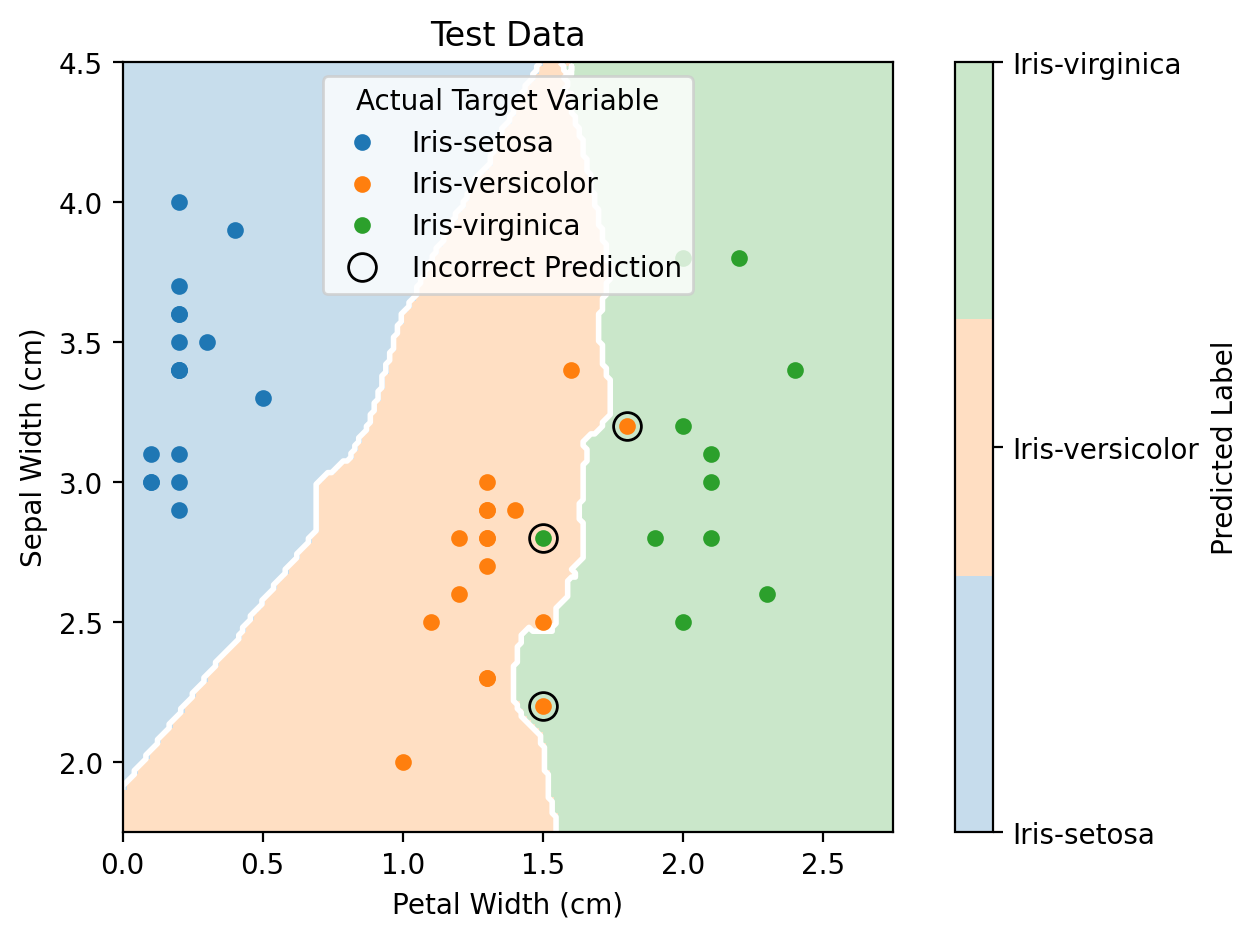

In [254]:
fig, ax = plt.subplots(figsize=[10, 5])
extent = [0, 2.75, 1.75, 4.5]

colors = ["tab:blue", "tab:orange", "tab:green"]
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

plot_prediction_boundaries(ax, predictions_knn, extent, colors, labels, N=N_values)
plot_data_with_labels(ax, data_test, labels, "Test Data", extent)
plot_mistakes(ax, mistakes, "black")
ax.legend(title="Actual Target Variable")

Now that looks great! Let's bring this all together and make this into a subplot so we can see the training data that was used by the KNN algorithm to make this boundary along with the test data as well. We'll also highlight the prediction mistakes in the test data.

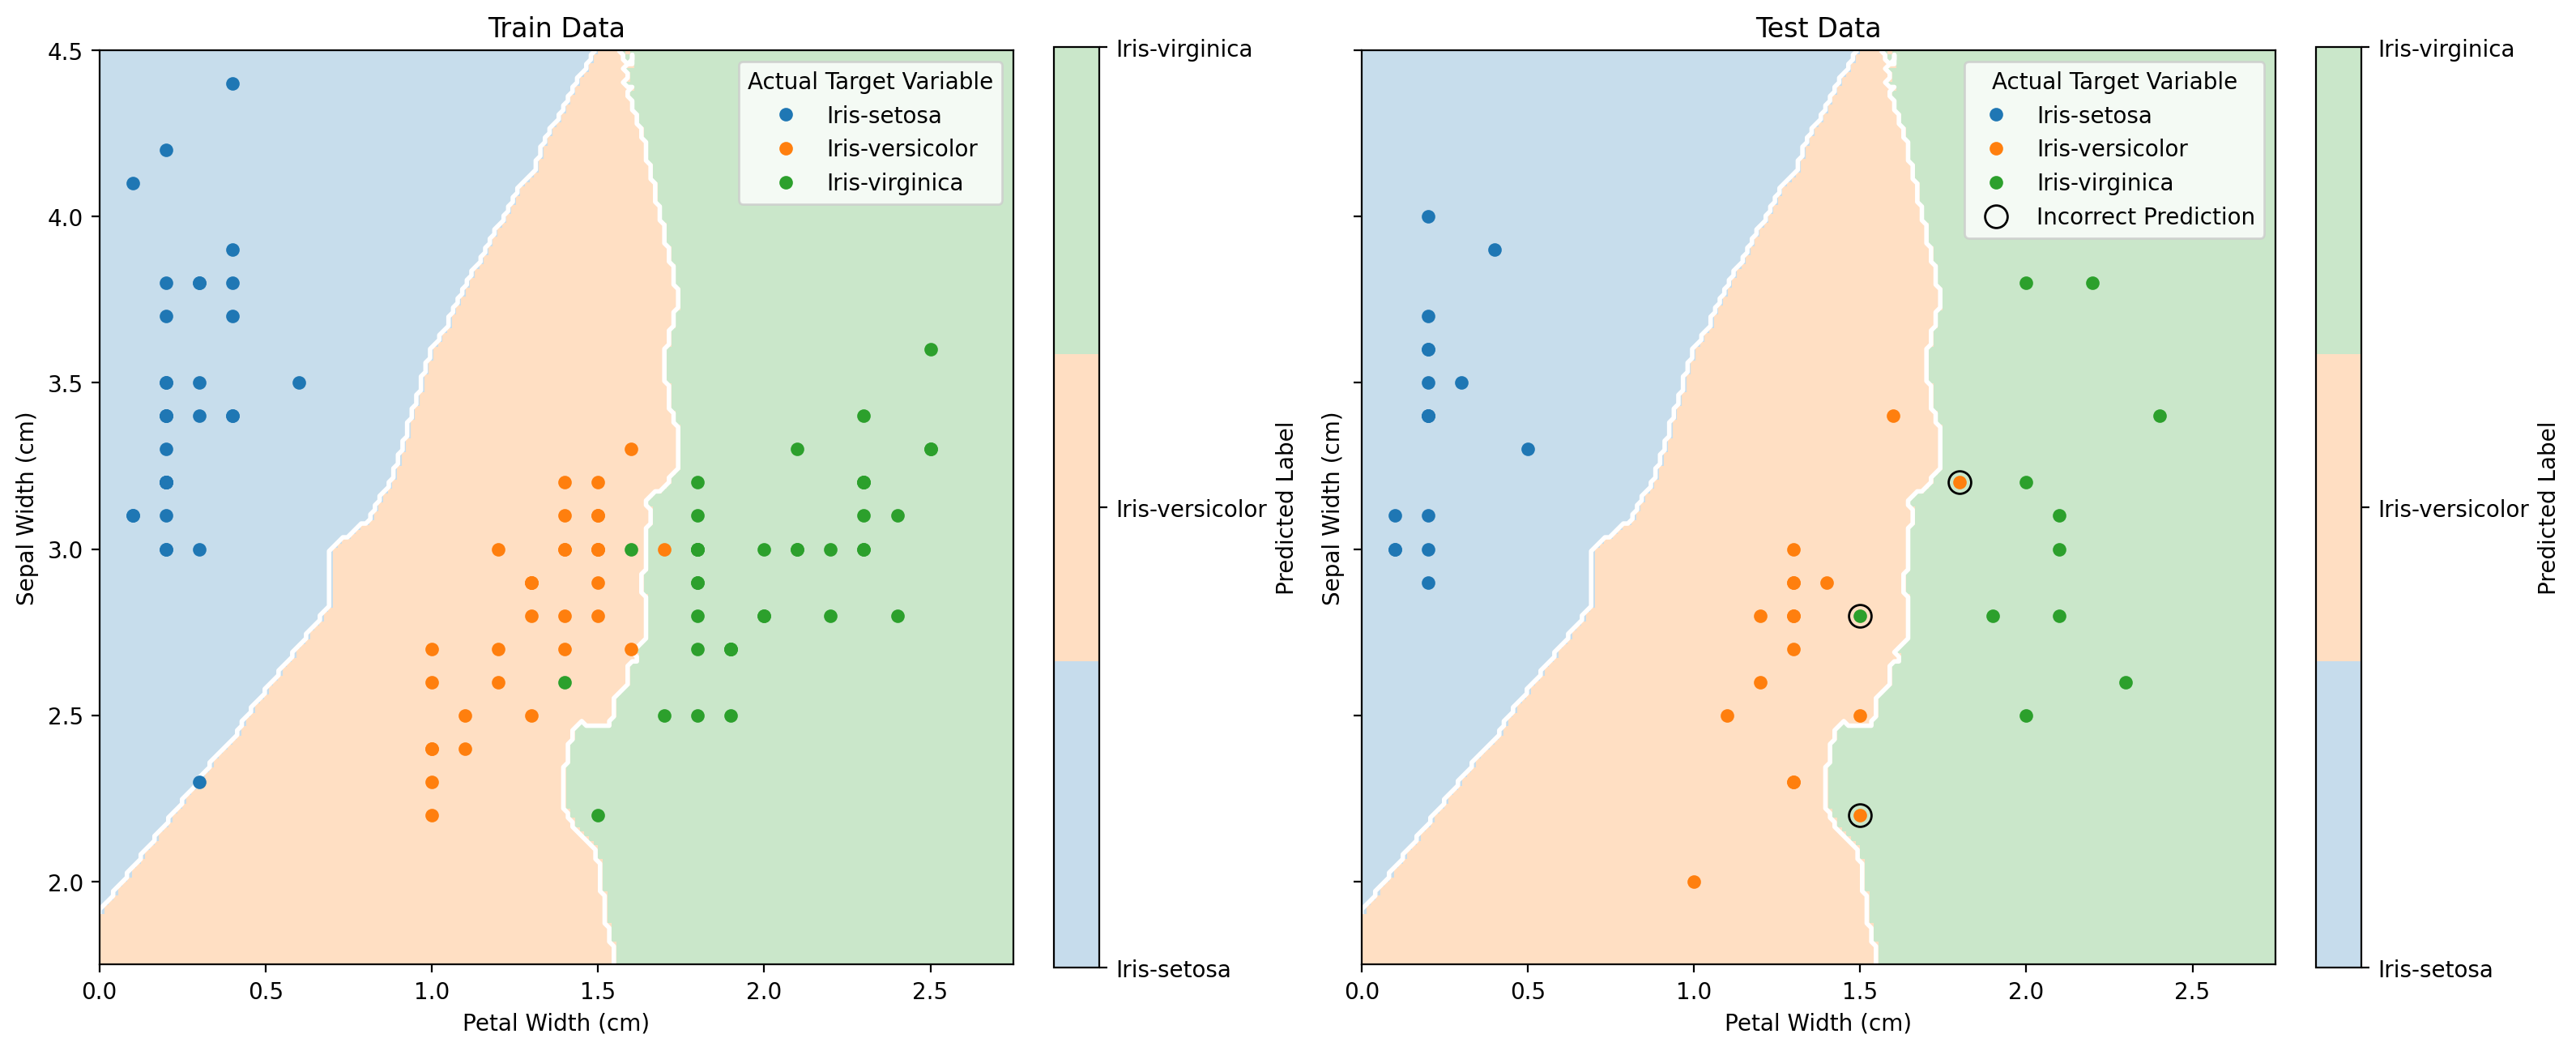

In [255]:
fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=[16, 8], sharex=True, sharey=True)
extent = [0, 2.75, 1.75, 4.5]

colors = ["tab:blue", "tab:orange", "tab:green"]
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

plot_prediction_boundaries(
    ax_train, predictions_knn, extent, colors, labels, N=N_values
)
plot_data_with_labels(ax_train, data_train, labels, "Train Data", extent)
ax_train.legend(title="Actual Target Variable")

plot_prediction_boundaries(ax_test, predictions_knn, extent, colors, labels, N=N_values)
plot_data_with_labels(ax_test, data_test, labels, "Test Data", extent)
plot_mistakes(ax_test, mistakes, "black")
ax_test.legend(title="Actual Target Variable")
plt.tight_layout()  # Generally helps the plot look a bit cleaner

This is a very informative plot. What we can see here is that the KNN decision boundary with $k=5$ very clearly separates the Iris-setosa class from the rest. The training samples define the boundary and that leads to 3 mistakes on the test data when the test observations appear near the border of that boundary. The boundaries are also nonlinear but not overly variable. This does mean that there are a few training observations that are not on the correct side of the decisin boundary. This can often depend on our choice of $k$.

Let's repeat this process again, but this time with $k=1$ to get a sense of the difference that the number of nearest neighbors can make for the variability of the boundary.

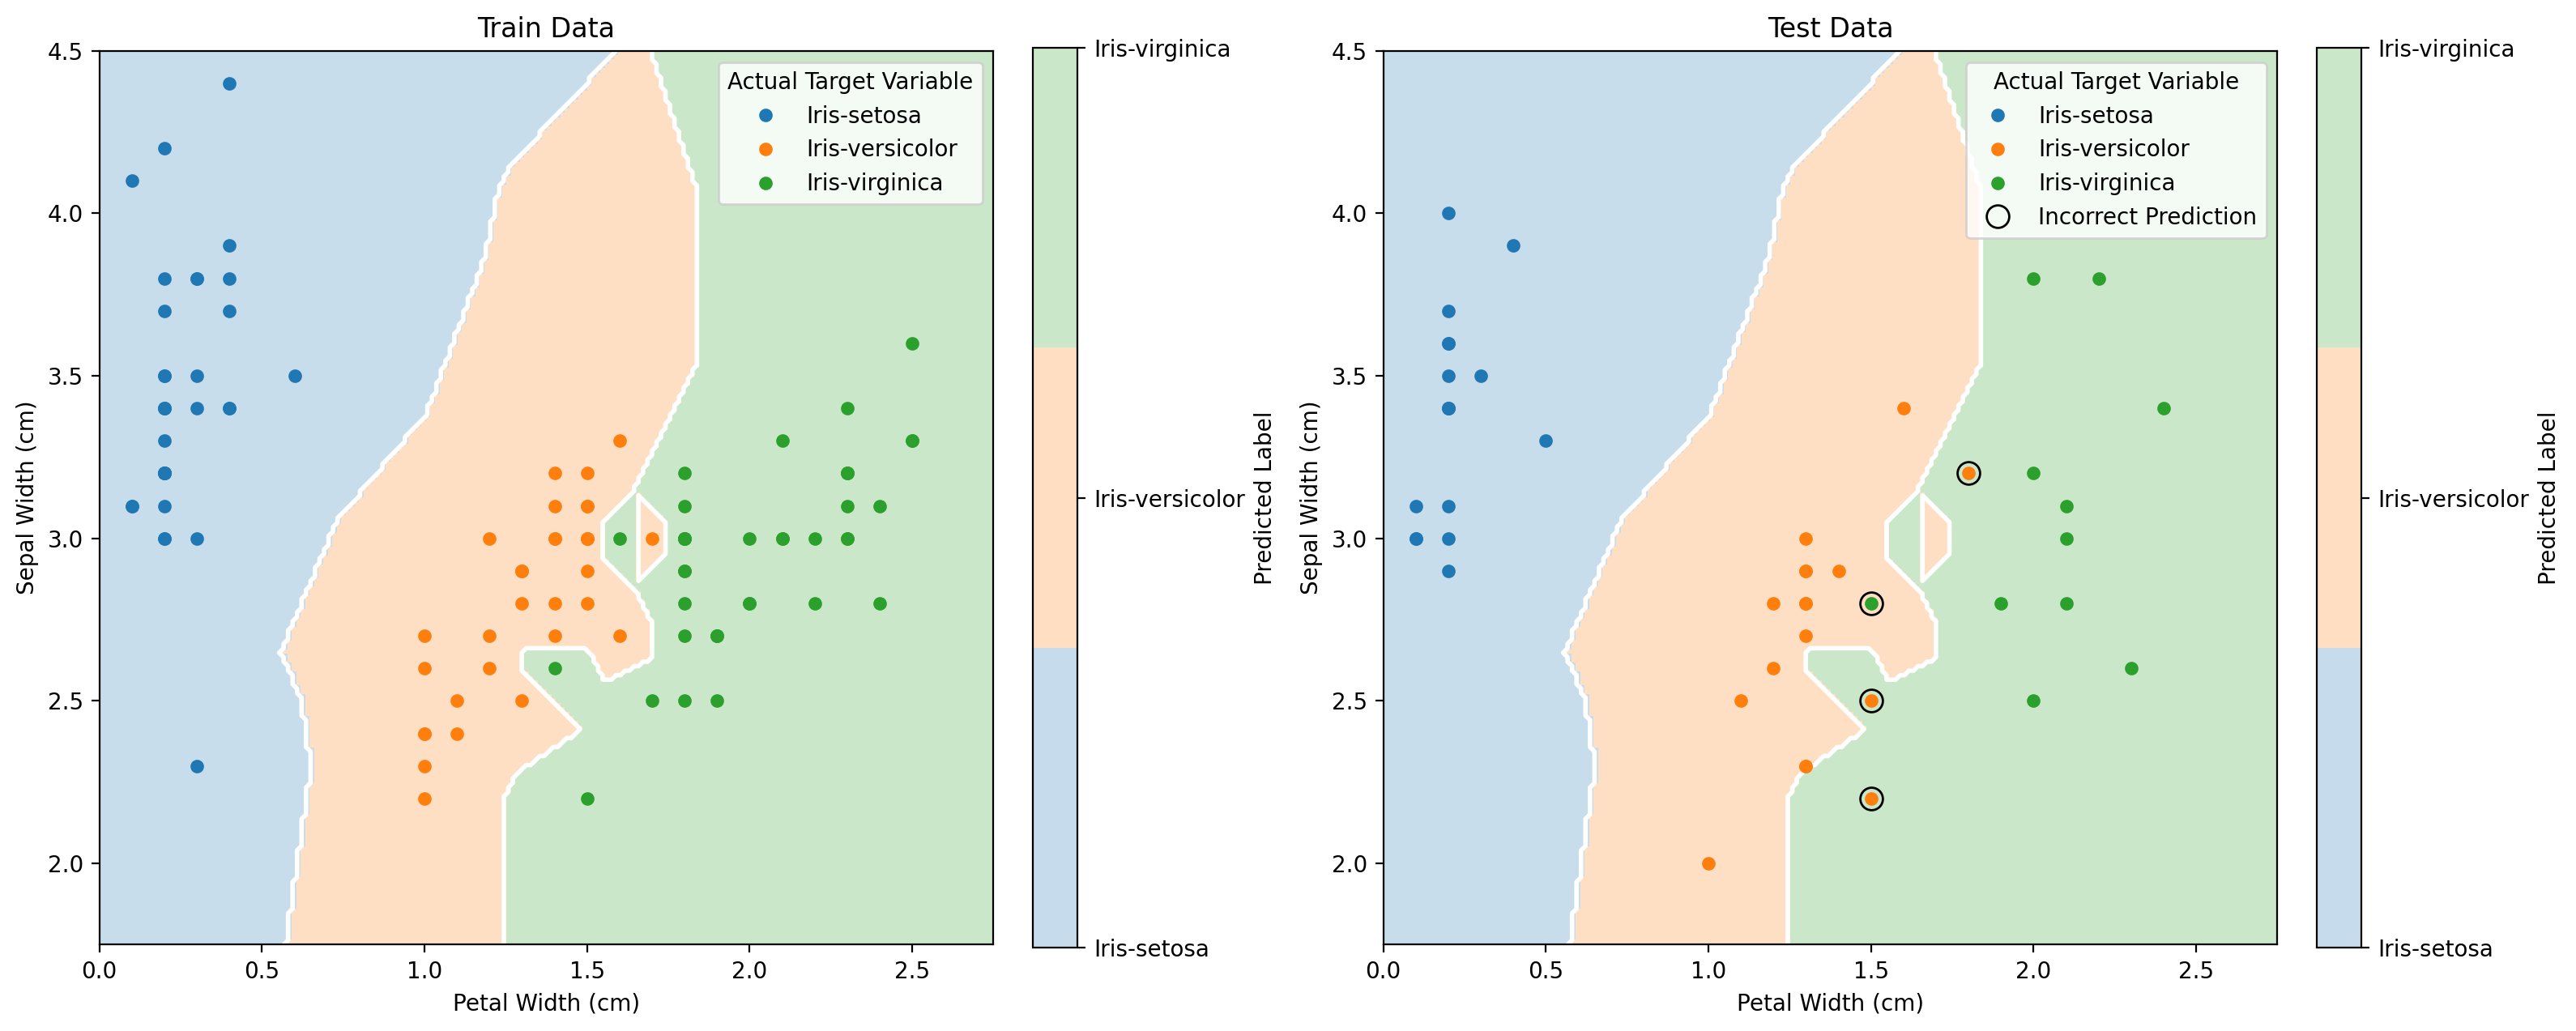

In [256]:
# Make predictions on the test data
k = 1
y_prediction = myknn.predict(x_test, k)

# Get the mistakes that were made in prediction
data_test = pd.read_csv("data/test.csv")
data_predictions = data_test
data_predictions.insert(
    3, "prediction", y_prediction
)  # Adds the column to the 3rd index (becomes the 4th column)
data_predictions["correct"] = (
    data_predictions["Species"] == data_predictions["prediction"]
)
data_predictions = data_predictions.drop(columns=["Species"])
data_predictions = data_predictions.rename(columns={"prediction": "Species"})
mistakes = data_predictions[data_predictions["correct"] == False]

# Create the matrix of predictions to help plot where the decision boundaries are
N_values = 200
predictions_knn = create_boundary(extent, myknn, k=k, N=N_values)
translate_dictionary = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
predictions_knn = label_to_num(predictions_knn, translate_dictionary)

# Plot the train and test data on top of the decision boundaries and show the mistakes for the test data
fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=[16, 8])
extent = [0, 2.75, 1.75, 4.5]

colors = ["tab:blue", "tab:orange", "tab:green"]
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

plot_prediction_boundaries(
    ax_train, predictions_knn, extent, colors, labels, N=N_values
)
plot_data_with_labels(ax_train, data_train, labels, "Train Data", extent)
ax_train.legend(title="Actual Target Variable")

plot_prediction_boundaries(ax_test, predictions_knn, extent, colors, labels, N=N_values)
plot_data_with_labels(ax_test, data_test, labels, "Test Data", extent)
plot_mistakes(ax_test, mistakes, "black")
ax_test.legend(title="Actual Target Variable")
plt.tight_layout()

What we can clearly see here is that in this case, EVERY training observation is correctly classified because it's based on the 1 nearest observation in the training data. However, this leads to a highly variable decision boundary and the number of mistakes has increased on the TEST data from 3 to 4. This is a common problem in prediction known as the bias-variance tradeoff. If the prediction algorithm is too flexible in how much the boundary can change with the training data (like is the case with $k=1$), this often results in poor predictions. Similarly, if our algorithm is not flexible enough we can also get poor predictions. We often seek a balance, and having a value closer to $k=5$ is better than $k=1$ in this case.

We've now dived deeply into classification, but that's only one half of prediction. The other half is regression, which we turn to next!